In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [2]:
df = pd.read_csv('Rainfall.csv')

In [3]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [4]:
df.shape

(366, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [7]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [8]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip()

In [10]:
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [11]:
df=df.drop(columns='day',axis=1)

In [12]:
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [13]:
df["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [14]:
# handle missing values
df["winddirection"] = df["winddirection"].fillna(df["winddirection"].mode()[0])
df["windspeed"] = df["windspeed"].fillna(df["windspeed"].median())

In [15]:
df["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
       160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [16]:
df['rainfall'].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['rainfall']=le.fit_transform(df['rainfall'])

In [18]:
df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

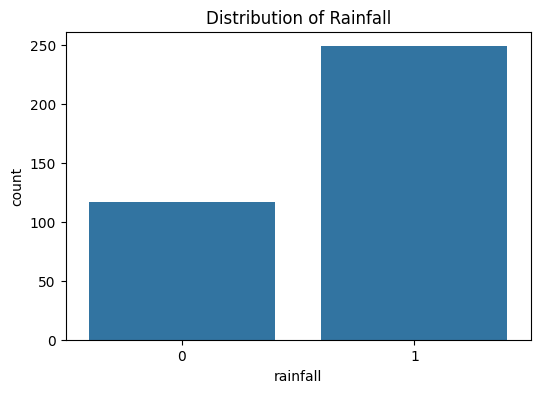

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['rainfall'])
plt.title("Distribution of Rainfall")
plt.show()

In [20]:
df

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9


In [21]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [22]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

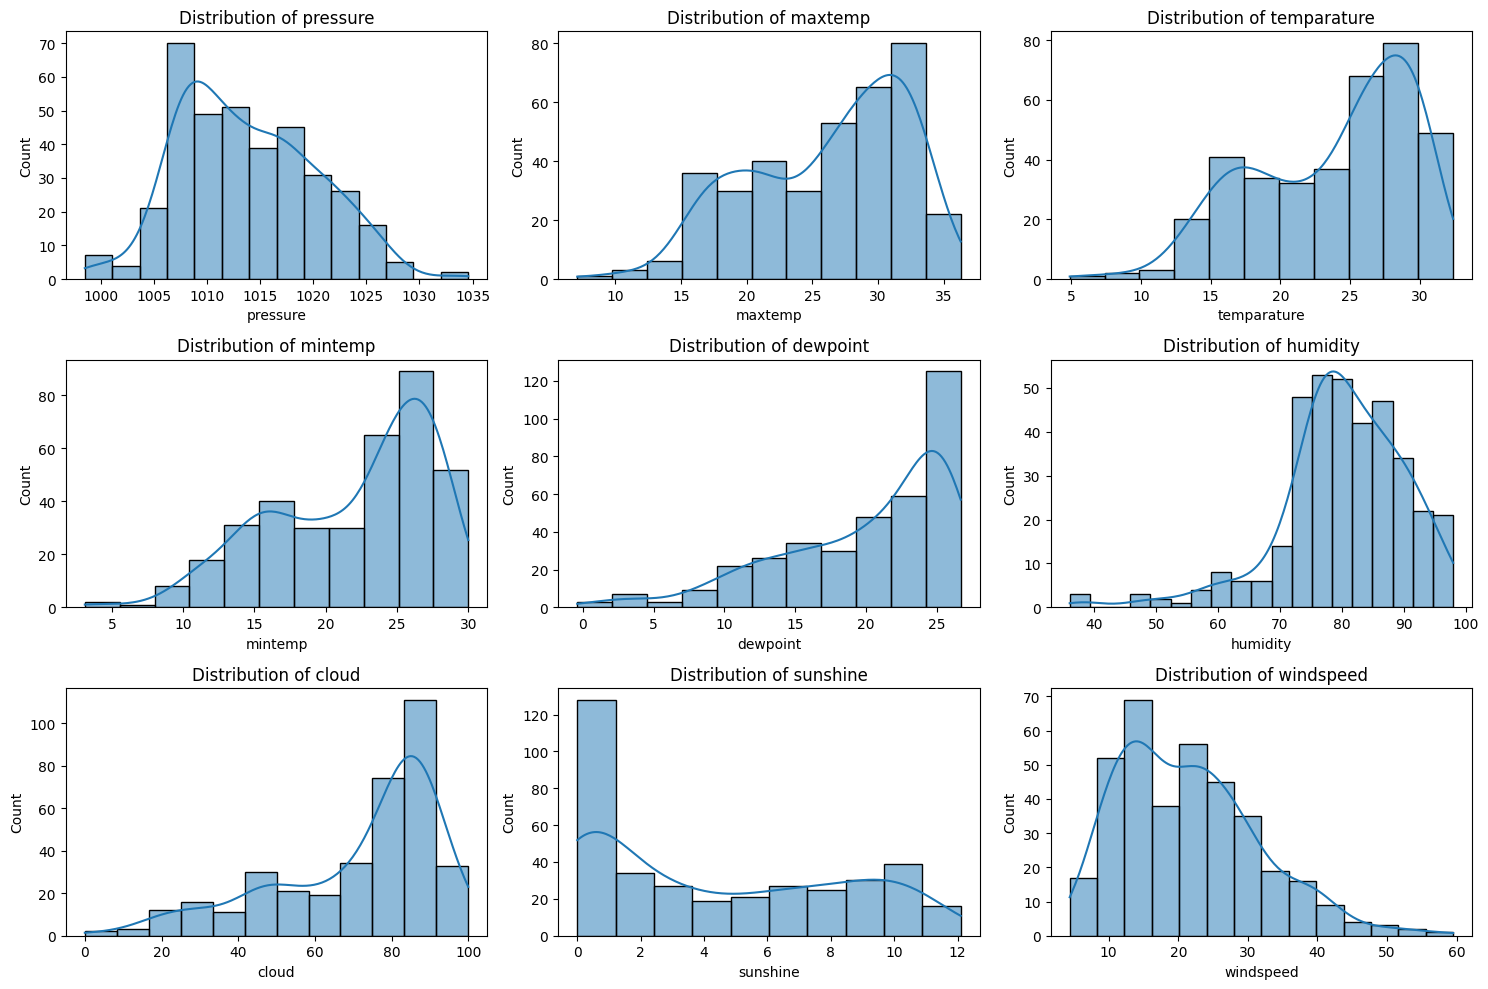

In [23]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

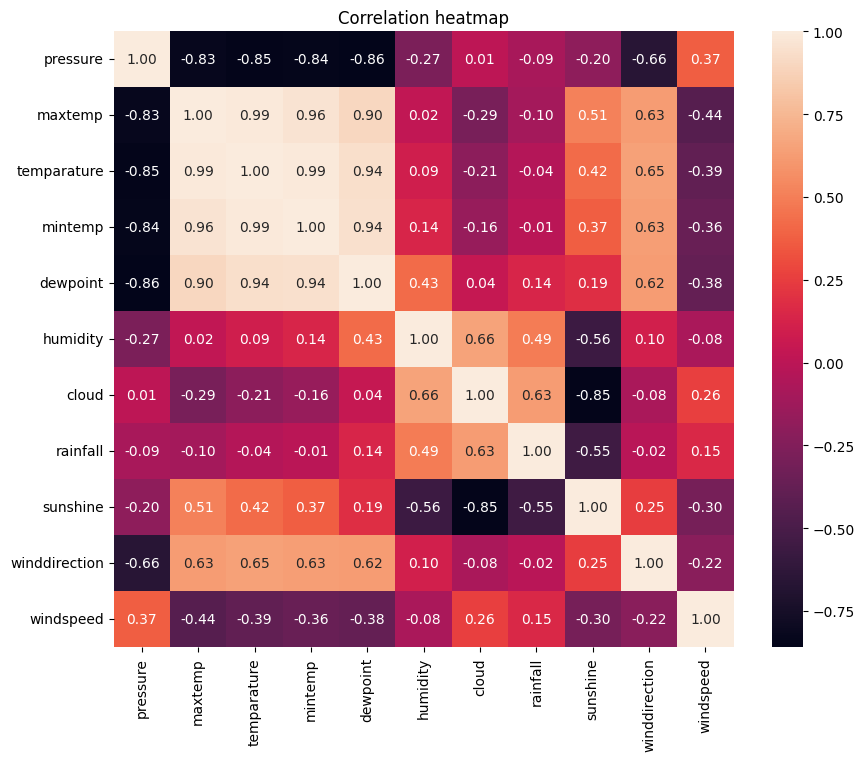

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

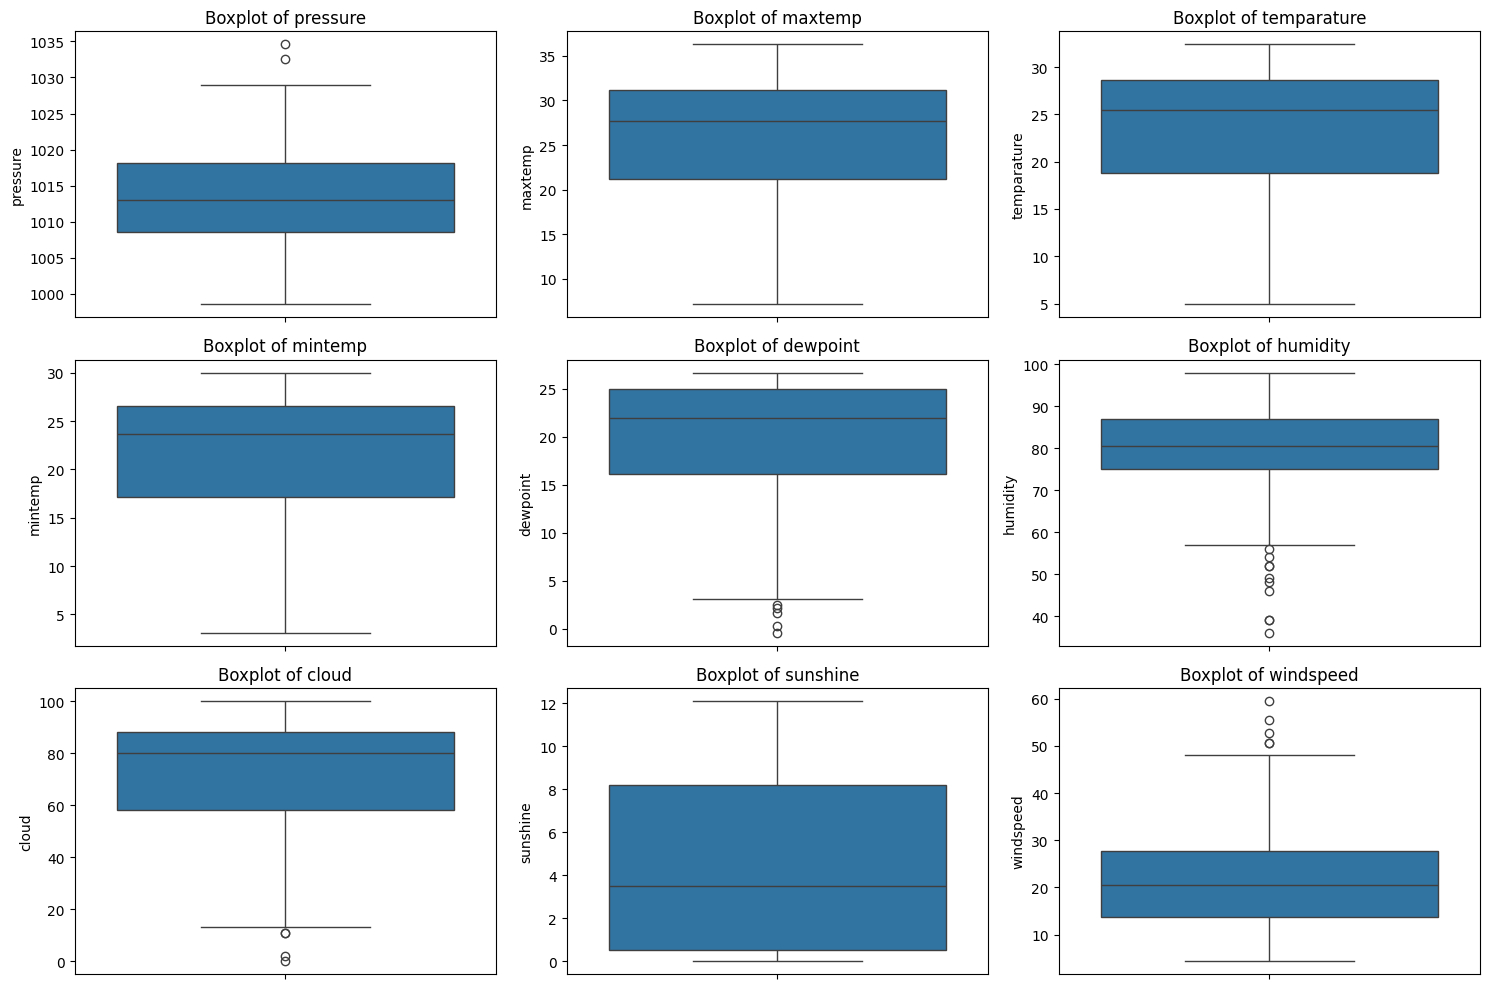

In [25]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(df[column])
  plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

In [26]:
# drop highly correlated column
df = df.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [27]:
df

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...
361,1022.7,15.0,84,90,1,0.0,30.0,18.4
362,1026.6,12.8,75,85,1,1.0,20.0,25.9
363,1025.9,13.3,75,78,1,4.6,70.0,33.4
364,1025.3,13.3,78,86,1,1.2,20.0,20.9


In [28]:
X = df.drop(columns='rainfall',axis=0)
Y = df['rainfall']

In [29]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=2)
X,Y = sm.fit_resample(X,Y)

In [30]:
Y.value_counts()

rainfall
1    249
0    249
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # keep 95% of variance
X = pca.fit_transform(X)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 15, 20, 30],
    "min_samples_split": [2, 5, 7, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [35]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [36]:
best_rf_model = grid_search_rf.best_estimator_

print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.85       0.825      0.8375     0.82278481 0.82278481]
Mean cross-validation score: 0.831613924050633


In [38]:
Y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy:", accuracy_score(Y_test, Y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

Test set Accuracy: 0.82
Test set Confusion Matrix:
 [[46 14]
 [ 4 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84        60
           1       0.72      0.90      0.80        40

    accuracy                           0.82       100
   macro avg       0.82      0.83      0.82       100
weighted avg       0.84      0.82      0.82       100



**Prediction on unknown data**

In [39]:
# Sample input data
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

# Create DataFrame
input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])

# Step 1: Standardize the input using previously fitted scaler
scaled_input = sc.transform(input_df)

# Step 2: Apply PCA using previously fitted PCA
pca_input = pca.transform(scaled_input)

# Step 3: Make prediction
prediction = best_rf_model.predict(pca_input)

# Step 4: Print result
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [40]:
model_data = {
    "model": best_rf_model,
    "scaler": sc,
    "pca": pca,
    "feature_names": ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
}

with open("rainfall_prediction_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

In [42]:
import sklearn
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)

numpy 2.0.1
pandas 2.2.3
sklearn 1.6.1
